# Milestone 1

Digital Talent Scholarship 2018, Kelas A-BIG DATA - Universitas Gadjah Mada

Anggota:

1. Luthfi Zharif

2. Larasati Aisyah R. A.

3. Karyadi

4. Izzan Rijal

5. Ismul Aksan

Kelompok kami mengeksplorasi aktivitas perusahaan rintisan, atau yang biasa dikenal dengan startup menggunakan dataset berita dari [GDELT](https://www.gdeltproject.org/). Proyek ini akan terus kami perbaiki selama beberapa waktu kedepan.
Laporan ini akan terbagi menjadi beberapa bagian, yaitu pendahuluan, ekstraksi data, transformasi data, dan analisis.

# Pendahuluan

Saat ini, dunia industri sedang memasuki babak baru yaitu revolusi industri keempat yang ditandai dengan perkembangan teknologi yang sangat cepat serta peran teknologi dan informasi yang dominan dalam kehidupan manusia. Perkembangan teknologi berubah pada jangka waktu yang tidak terlalu lama.  Perubahan teknologi ini menyebabkan adanya disrupsi yang saat ini sudah tercermin dengan banyaknya start up atau perusahaan rintisan.  

Startup dapat didefinisikan sebagai perusahaan yang bisnisnya baru yang berkembang pesat dan bertujuan untuk memenuhi kebutuhan pasar dengan mengembangkan atau menawarkan produk, proses, atau layanan yang inovatif secara cepat. Perusahaan rintisan atau start up menerapkan berbagai teknologi seperti internet, e-commerce, komputer, telekomunikasi atau robotik. Pada umumnya, start up berperan dalam membuat dan mengimplementasikan proses inovasi sejak pengembangan, validasi, dan research untuk target pasarnya.

Saat ini, banyak Startup mulai bermunculan di dunia, termasuk di Indonesia. Perusahaan ini berkembang dengan cepat dan memberikan perubahan perilaku masyarakat. Masyarakat yang awalnya menggunakan ojek pangkalan berpindah ke ojek online dengan segala fitur yang ada. Masyarakat yang tadinya berbelanja di mall kini belanja di toko online yang memberikan layanan antar sampai ke rumah.

Salah satu penyebab tumbuh subur startup di Indonesia ialah banyaknya pengguna internet. Dari hasil survei Asosiasi Penyelenggara Jasa Internet Indonesia (APJII), pada tahun 2016 ada 132,7 juta pengguna internet dari total 256,2 juta penduduk Indonesia. Apabila dikelompokkan berdasarkan perangkat yang dipakai ada kelompok yakni mobile phone (63.1 juta pengguna atau 47 %), mobile dan komputer (50.7 juta pengguna atau 51%) serta computer (2,2 juta pengguna atau 2%). Ini merupakan pangsa pasar yang cukup besar, dan memungkinkan perkembangan start up.

Unicorn di dunia startup adalah perusahaan startup yang memiliki nilai pasar lebih dari US$1 miliar. Istilah ini pertama kali digunakan oleh venture capitalist, Aileen Lee, dimana dia memilih kuda bertanduk satu ini untuk mewakili kelangkaan statistik dari usaha-usaha startup. Di Negara lain, seperti Tiongkok, saat ini sudah terdapat 46 perusahaan startup yang masuk dalam kategori Unicorn. Di Indonesia terdapat 4 perusahaan startup yang sudah masuk kategori Unicorn, yakni Bukalapak, Gojek, Tokopedia dan Traveloka. 

Melihat perkembangan startup Indonesia yang cukup dinamis kami tertarik untuk mengetahui bagaimana perkembangan startup Indonesia di mata dunia melalui gdelt. 


# Ekstraksi Data
## Download

Data ini bisa diolah dengan dua cara, yakni melalui olah secara cloud maupun local. Dalam notebook ini, semua pengolahan akan dilakukan secara local. Oleh karena itu, kita perlu mengunduh data GDELT ke dalam mesin lokal terlebih dahulu.

Berikut adalah contoh script untuk mengunduh data GDELT dengan country code 'ID'. Country code ini menandakan bahwa kita hanya menyimpan data yang berhubungan dengan Indonesia. Source code ini disadur dari [Github pak Guntur Budi](https://github.com/gunturbudi/digital-talent/blob/master/RETRIEVE%20GDELT%20DATA.ipynb)

In [ ]:
import requests
import lxml.html as lh

gdelt_base_url = 'http://data.gdeltproject.org/events/'

# get the list of all the links on the gdelt file page
page = requests.get(gdelt_base_url+'index.html')
doc = lh.fromstring(page.content)
link_list = doc.xpath("//*/ul/li/a/@href")

# separate out those links that begin with four digits
file_list = [x for x in link_list if str.isdigit(x[0:4])]
print(file_list)

infilecounter = 0
outfilecounter = 0

import os.path
import urllib
import zipfile
import glob
import operator

local_path = os.getcwd()

fips_country_code = 'ID'

for compressed_file in file_list[infilecounter:]:
    print(compressed_file)

    # if we dont have the compressed file stored locally, go get it. 
    # Keep trying if necessary.
    while not os.path.isfile(local_path + compressed_file):
        print('downloading, '),
        urllib.request.urlretrieve(url=gdelt_base_url + compressed_file,
                           filename=local_path + compressed_file)

    # extract the contents of the compressed file to a temporary directory
    print('extracting,'),
    z = zipfile.ZipFile(file=local_path + compressed_file, mode='r')
    z.extractall(path=local_path + 'tmp/')

    # parse each of the csv files in the working directory,
    print('parsing,'),
    for infile_name in glob.glob(local_path + 'tmp/*'):
        outfile_name = local_path + 'gdelt_id/' + fips_country_code 
        + '%04i.tsv' % outfilecounter

        # open the infile and outfile
        with open(infile_name, mode='r', encoding='utf-8') as infile,
        open(outfile_name, mode='w') as outfile:
            for line in infile:
                # extract lines with our interest country code
                # Try and except to pass trouble data
                try:
                    # We extract only the lines where there is relation 
                    # about Indonesia (ID)
                    if fips_country_code in operator.
                    itemgetter(51, 37, 44)(line.split('\t')):
                        outfile.write(line)
                except:
                    pass
            outfilecounter += 1
        # delete the temporary file
        os.remove(infile_name)
    infilecounter += 1
    print('done')

## Simpan ke MySQL
Perlu dilakukan penyimpanan data ke dalam database MySQL agar data bisa diakses secara local. Adapun langkah yang
dilakukan adalah sebagai berikut

### Bangun koneksi ke MySQL lokal
Silakan buka phpMyAdmin atau program SQL favorit anda (HeidiSQL, Laragon), lalu buat database dengan nama 'gdelt_content_id'

In [1]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine

host = 'localhost'
port = '3306'
username = 'root'
password = ''
database = 'gdelt_content_id'

# Create Connection to database
# engine = create_engine('mysql+pymysql://'+username+
# ':'+password+'@'+host+':'+port+'/'+database)

# Note: We use pymysql instead of sqlalchemy because sqlalchemy
# somehow don't allow the text query. Strange bug.
conn = pymysql.connect(
    host=host,
    port=int(port),
    user=username,
    passwd=password,
    db=database,
    charset='utf8mb4')
'''engine = create_engine('mysql+pymysql://root: @localhost:3306
/gdelt_content_id')'''

def run(sql):
    df = pd.read_sql_query(sql, conn)
    return df

### List Data dalam Folder
Di bagian ini, kita akan membaca data GDELT harian (tsv) dalam folder. Data tersebut akan dikompilasi menjadi dataframe Pandas.

In [ ]:
from os import listdir
from os.path import isfile, join
folder_id = './gdelt_id/'
files = [f for f in listdir(folder_id) if isfile(join(folder_id, f))]
print(files)

In [ ]:
# Open first file for sanity check
df_awal = pd.read_csv(folder_id + files[0],sep="\t")
df_awal.head()

### Langsung simpan ke MySQL
Untuk menyimpan data ke SQL, kita update data tabelnya untuk setiap file tsv yang ada

In [ ]:
# Read header / column names
colnames = list(pd.read_excel('CSV.header.fieldids.xlsx', 
                              sheet_name='CSV.header.dailyupdates'))

for berkas in files:
    print('Extracting ' + berkas)
    df_satuan = pd.DataFrame()
    
    # Important: If your ID0000.tsv contains header, you can delete the header
    df_satuan = pd.read_csv(folder_id + berkas, sep="\t", names= colnames)
    df_satuan.to_sql(name = database, con = engine, 
                     if_exists = 'append', index = False)

# Transformasi Data

## Cek Data Awal
Setelah data tersimpan secara sukses di MySQL, kita melakukan eksplorasi sederhana. Langkah pertama yang perlu dilakukan adalah melakukan filter artikel yang sesuai dengan topik startup. Dengan asumsi judul berita dimuat dalam URL artikel, maka dilakukan  filter kolom 'SOURCEURL' dengan menggunakan kata kunci yang berhubungan dengan topik startup. Sejauh ini ada beberapa kata kunci adalah sebagai berikut:

- Startup

- Start-up

- Unicorn

- Silicon-valley

- Ecommerce

- E-commerce

- Rintisan

- Perusahaan-rintisan

- Perusahaan-startup

- Bisnis-startup

- Startup-business

- Startup-digital

- Digital-startup

- Crowdfunding

- Fintech

- Marketplace

- Digital-platform

- Platform-digital


In [2]:
# SQL query to look for keyword in SOURCEURL
data_startup = run("""
SELECT 
    * 
FROM 
    gdelt_content_id
WHERE
    sourceurl LIKE '%startup%' OR
    sourceurl LIKE '%unicorn%' OR
    sourceurl LIKE '%start-up%' OR
    sourceurl LIKE '%silicon-valley%' OR
    sourceurl LIKE '%ecommerce%' OR
    sourceurl LIKE '%e-commerce%' OR
    sourceurl LIKE '%rintisan%' OR
    sourceurl LIKE '%perusahaan-rintisan%' OR
    sourceurl LIKE '%perusahaan-startup%' OR
    sourceurl LIKE '%bisnis-startup%' OR
    sourceurl LIKE '%startup-business%' OR
    sourceurl LIKE '%startup-digital%' OR
    sourceurl LIKE '%digital-startup%' OR
    sourceurl LIKE '%crowdfunding%' OR
    sourceurl LIKE '%fintech%' OR
    sourceurl LIKE '%marketplace%' OR
    sourceurl LIKE '%digital-platform%' OR
    sourceurl LIKE '%platform-digital%'
    """)

In [3]:
print(data_startup.shape)
data_startup.head()

(6408, 58)


,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,798274953,20181029,201810,2018,2018.8192,GOV,GOVERNMENT,None,None,None,...,None,4,"Permata, Jakarta Raya, Indonesia",ID,ID04,-6.1458,106.752,10175966,20181029.0,http://fintechnews.sg/25313/blockchain/blockch...
1,798275016,20181029,201810,2018,2018.8192,GOV,GOVERNMENT,None,None,None,...,10175966,4,"Permata, Jakarta Raya, Indonesia",ID,ID04,-6.1458,106.752,10175966,20181029.0,http://fintechnews.sg/25313/blockchain/blockch...
2,798275087,20181029,201810,2018,2018.8192,IDN,INDONESIA,IDN,None,None,...,None,4,"Permata, Jakarta Raya, Indonesia",ID,ID04,-6.1458,106.752,10175966,20181029.0,http://fintechnews.sg/25313/blockchain/blockch...
3,798275096,20181029,201810,2018,2018.8192,IDNBUS,INDONESIA,IDN,None,None,...,10175966,4,"Permata, Jakarta Raya, Indonesia",ID,ID04,-6.1458,106.752,10175966,20181029.0,http://fintechnews.sg/25313/blockchain/blockch...
4,798359666,20181029,201810,2018,2018.8192,BUS,COMPANY,None,None,None,...,None,1,Indonesia,ID,ID,-5.0000,120.000,ID,20181029.0,https://www.dealstreetasia.com/stories/indones...


Berdasarkan hasil di atas, terdapat beberapa data duplikat, yang dapat dilihat dari kolom 'SOURCEURL'. Data duplikat ini 
diduga memiliki informasi yang berbeda pada kolom-kolom lainnya, seperti Actor1Name, Actor2Name, dll.

Untuk saat ini, kita memfokuskan hasil dengan menghapus data duplikat.

In [4]:
data_startup_dup = data_startup.copy()

# Remove duplicate data, keep the first occurences
data_startup = data_startup.drop_duplicates('SOURCEURL')
data_startup.shape

(2217, 58)

Dengan menghapus data duplikat diperoleh 2217 baris berita yang unik, jumlah tersebut hampir 1/3 bagian dari data sebelumnya. Selanjutnya, data tersebut disimpan ke dalam MySQL. Namun, data sebelumnya tetap disimpan untuk analisis selanjutnya.

In [5]:
# Save non-duplicated data to 'startup_indonesia' table
host = 'localhost'
port = '3306'
username = 'root'
password = ''
database = 'gdelt_content_id'
database_name = 'startup_indonesia'
engine_s = create_engine('mysql+pymysql://'+username+':'+password+'@'+host+':'
                         +port+'/'+database)
data_startup.to_sql(database_name, engine_s)

# Save duplicated data to 'startup_indonesia_dup' table
database = 'gdelt_content_id'
database_name_dup = 'startup_indonesia_dup'
data_startup_dup.to_sql(database_name_dup, engine_s)

Untuk analisis selanjutnya, kita akan menggunakan data lima tahun terakhir saja, terhitung dari 2014 - Oktober 2018.

In [3]:
data_5years = run("SELECT * FROM startup_indonesia WHERE Year BETWEEN 2014 AND 2018")

,index,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,0,798274953,20181029,201810,2018,2018.8192,GOV,GOVERNMENT,None,None,...,None,4,"Permata, Jakarta Raya, Indonesia",ID,ID04,-6.14580,106.7520,10175966,20181029.0,http://fintechnews.sg/25313/blockchain/blockch...
1,4,798359666,20181029,201810,2018,2018.8192,BUS,COMPANY,None,None,...,None,1,Indonesia,ID,ID,-5.00000,120.0000,ID,20181029.0,https://www.dealstreetasia.com/stories/indones...
2,5,797650072,20181026,201810,2018,2018.8110,GOV,FINANCE MINIST,None,None,...,-2679652,4,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.8290,-2679652,20181026.0,http://www.thejakartapost.com/news/2018/10/26/...
3,6,797801179,20181026,201810,2018,2018.8110,MED,PUBLISHER,None,None,...,None,1,Indonesia,ID,ID,-5.00000,120.0000,ID,20181026.0,https://www.mediapost.com/publications/article...
4,7,797376646,20181025,201810,2018,2018.8082,MOS,MUSLIM,None,None,...,ID,1,Indonesia,ID,ID,-5.00000,120.0000,ID,20181025.0,https://www.dealstreetasia.com/stories/indones...
5,8,797551618,20181025,201810,2018,2018.8082,IDN,INDONESIA,IDN,None,...,None,1,Indonesia,ID,ID,-5.00000,120.0000,ID,20181025.0,https://www.scmp.com/tech/apps-social/article/...
6,10,797017568,20181024,201810,2018,2018.8055,GOV,GOVERNMENT,None,None,...,None,4,"Sendo, Yogyakarta, Indonesia",ID,ID10,-7.75111,110.1370,9234193,20181024.0,https://asia.nikkei.com/Spotlight/Cover-Story/...
7,22,797117089,20181024,201810,2018,2018.8055,IDN,INDONESIAN,IDN,None,...,None,1,Indonesia,ID,ID,-5.00000,120.0000,ID,20181024.0,https://sg.news.yahoo.com/indonesia-tax-manage...
8,23,797168675,20181024,201810,2018,2018.8055,BUS,BUSINESS,None,None,...,None,4,"Antara, Aceh, Indonesia",ID,ID01,3.52920,99.0184,10119106,20181024.0,https://en.antaranews.com/news/119837/fintech-...
9,26,796649358,20171023,201710,2017,2017.8027,BUS,CORPORATION,None,None,...,ID,4,"Manila, Manila, Philippines",RP,RPD9,14.60420,120.9820,-2437894,20181023.0,https://www.dealstreetasia.com/stories/chinese...


# Analisis Data
Dengan data yang sudah unik tersebut, kita memulai analisis berita sesuai dengan kebutuhan. 

## Analisis sumber berita
Di bagian ini, akan ditampilkan website yang menjadi sumber berita.

In [4]:
import urllib

data_sourceurl = data_5years['SOURCEURL']
list_link = []

# for extracting domain url. Example: 
# http://fintechnews.sg/25313/blockchain/blockchain-indonesia/ --> fintechnews.sg
for link in data_sourceurl:
    list_link.append(urllib.parse.urlparse(link).netloc)
    
data_link = pd.Series(list_link)

# Count by its occurences
data_link_count = data_link.value_counts()
data_link_count

www.techinasia.com                163
www.dealstreetasia.com            158
www.thejakartapost.com            140
e27.co                             91
en.tempo.co                        63
fintechnews.sg                     44
sglinks.com                        35
www.ecosystemmarketplace.com       34
www.techinasia.com:443             33
ecommerce-journal.com              33
inc42.com                          33
www.crowdfundinsider.com           31
economictimes.indiatimes.com       28
jakartaglobe.beritasatu.com        27
www.nationmultimedia.com           25
sg.news.yahoo.com                  23
asia.nikkei.com                    22
www.thestar.com.my                 18
jakartaglobe.id                    17
www.digitalnewsasia.com            17
techcrunch.com                     16
www.businesstimes.com.sg           16
www.straitstimes.com               16
www.bloomberg.com                  16
www.forbes.com                     15
www.msn.com                        14
www.indonesi

Dari data di atas, diketahui pemberitaan startup di Indonesia banyak dilakukan oleh techinasia.com, dealstreetasia.com, dan thejakartapost.com.

## Analisis Tren Startup Berdasarkan Waktu
Dalam bagian ini, akan ditampilkan banyaknya berita startup dalam hitungan bulan. Analisis ini berguna untuk melihat kapan pemberitaan banyak bermunculan, serta melihat apakah ada peningkatan atau penurunan pemberitaan startup di Indonesia.

In [5]:
data_count = data_5years.copy()
# data_count['MonthYear'] = pd.to_datetime(data_count['MonthYear']
# .astype(str), format='%Y%m')

# Aggregate the table with count
data_count = data_count.groupby(data_count['MonthYear']).agg({'count'})
data_count = data_count.sort_index(ascending=True)
data_count['GLOBALEVENTID'].head()

,count
MonthYear,
201401,3
201402,14
201403,15
201404,15
201405,7


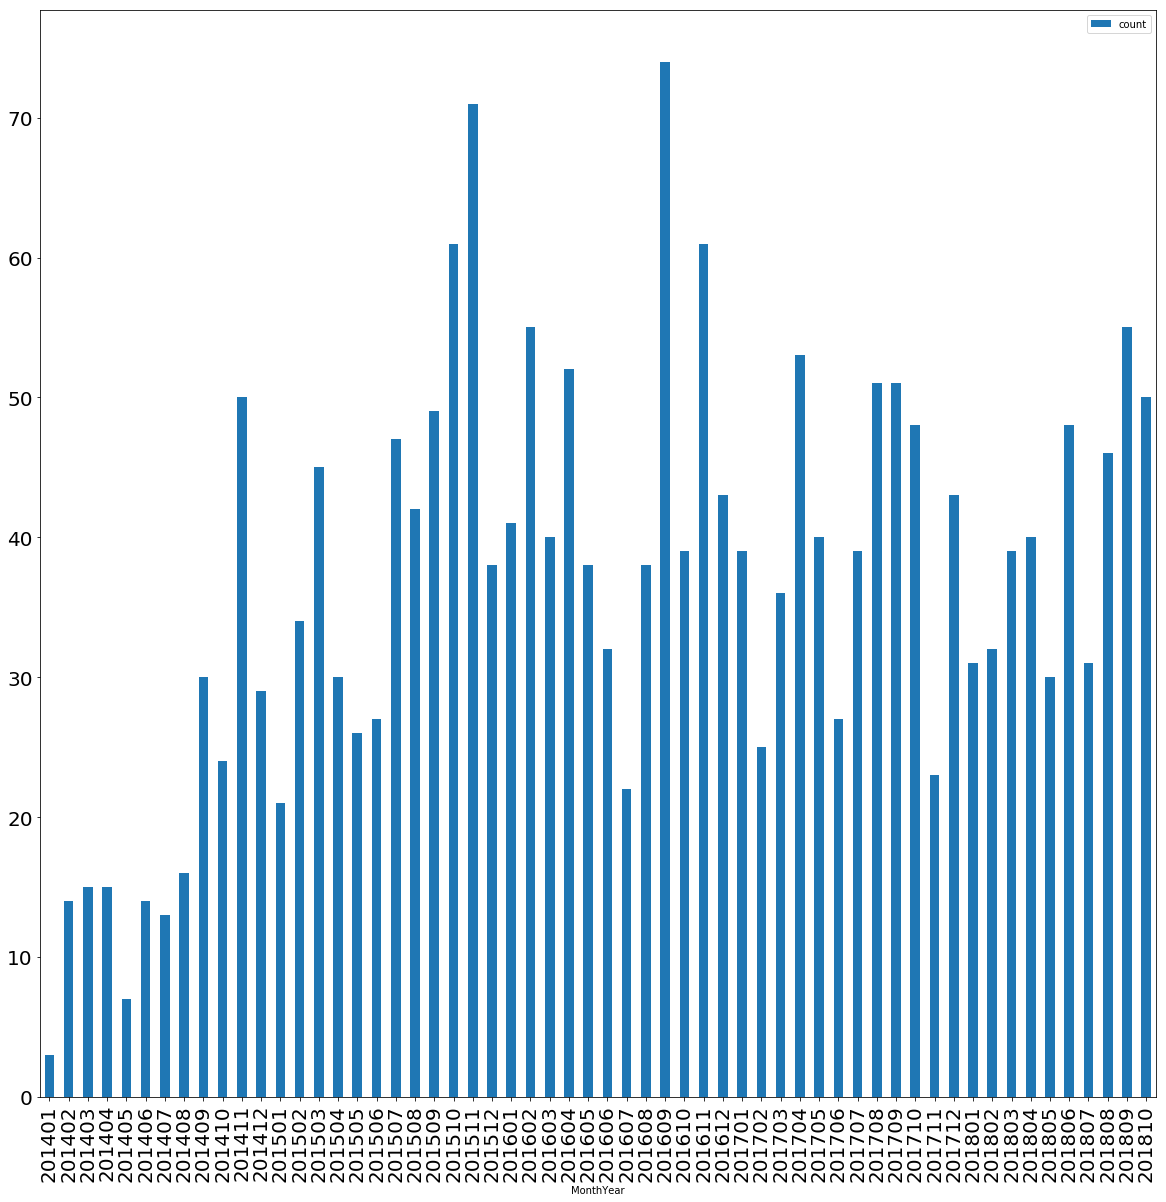

In [7]:
# display it using bar
data_count['GLOBALEVENTID'].plot(kind='bar', figsize=(20,20), fontsize=20)

Berdasarkan grafik diatas, terlihat bahwa pemberitaan startup di Indonesia masih mengalami fluktuasi pada 5 tahun terakhir. Tren kenaikan terlihat pada periode 2012-2014. Berita startup di Indonesia mulai sering bermunculan sejak November 2014.

## Analisis Statistika
Dalam analisis ini, kita akan coba melihat data GDELT dengan perspektif Statistika Inferensial. Ada beberapa variabel menarik yang bisa kita olah, diantaranya:
- Actor 1 & 2 Code
- Actor 1 & 2 Name
- Goldstein Scale
- Number of Mention
- Number of Sources
- Number of Article
- Average Tone

## Analisis Nada Berita
Nada berita pada GDELT tersimpan dalam variabel "AvgTone". Sesuai dengan referensi [Data Format Codebook GDELT 1.0](http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf), AvgTone memiliki skala -100 hingga 100. Nilai negatif menandakan berita bernada sangat negatif, dan juga sebaliknya.

In [41]:
# See stats of AvgTone variable
avgtone_desc = data_5years['AvgTone'].describe()
low_q = avgtone_desc[4]
high_q = avgtone_desc[6]
iqr = high_q - low_q

print(avgtone_desc)

count    2133.000000
mean        1.998609
std         2.506583
min       -13.636364
25%         0.699301
50%         2.027027
75%         3.375338
max        18.139535
Name: AvgTone, dtype: float64


Berdasarkan data tersebut, terlihat bahwa berita startup memiliki nada yang cenderung netral dengan skala dari -13,63 hingga 18,13 dan median 2,02. Ada bebarapa data outlier, dengan nada yang terlalu negatif maupun terlalu positif.

Seberapa banyak data nada berita yang outlier?

Jumlah outlier negatif = 66
Jumlah outlier positif = 46


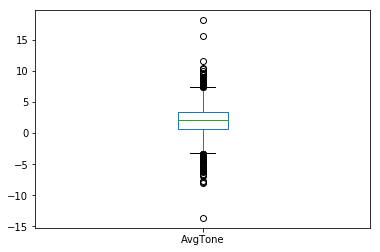

In [45]:
# See the data by box plot
data_5years['AvgTone'].plot.box()

# Check outlier data
lower_threshold = low_q - iqr * 1.5
higher_threshold = high_q + 1.5 * iqr

data_outlier_negative = data_5years.loc[data_5years['AvgTone'] < lower_threshold]
data_outlier_positive = data_5years.loc[data_5years['AvgTone'] > higher_threshold]

print("Jumlah outlier negatif = " + str(data_outlier_negative.shape[0]))
print("Jumlah outlier positif = " + str(data_outlier_positive.shape[0]))

Ternyata data outlier yang ada lumayan banyak, berjumlah puluhan.

Lalu bagaimana persebaran nada berita berdasarkan tahunnya?

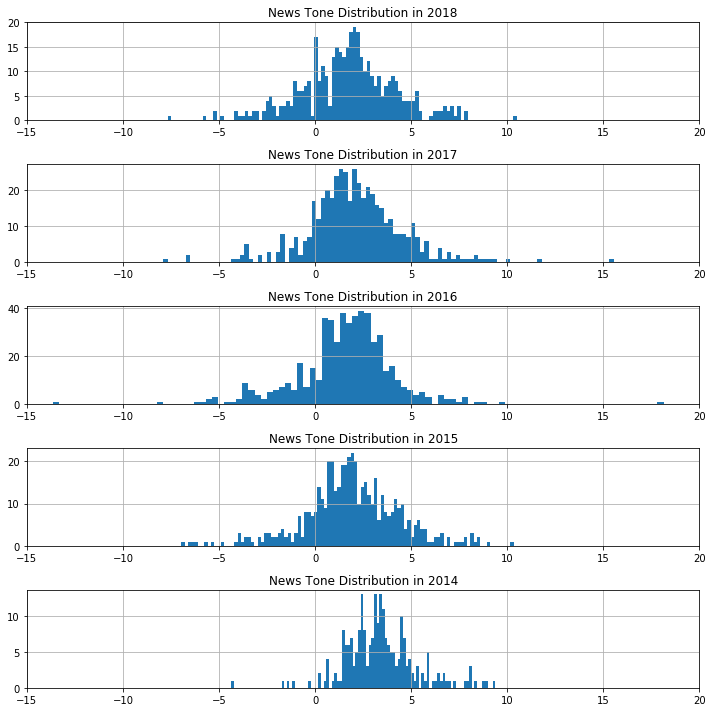

In [27]:
# Explore by tone
import matplotlib.pyplot as plt
def plot_histogram(df, n_rows, n_cols):
    fig = plt.figure()
    i = 0
    for tahun in df.Year.unique():
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df['AvgTone'].loc[df['Year'] == tahun].hist(bins=100,ax=ax,figsize=(10,10))
        ax.set_title("News Tone Distribution in " + str(tahun))
        ax.set_xlim(-15, 20)
        i = i + 1
    fig.tight_layout()
    plt.show()
    
plot_histogram(data_5years, 5, 1)

Persebaran data tiap tahunnya memiliki distribusi normal. Persebaran tahun 2014 condong lebih ke kanan (ke arah positif) dibandingkan tahun lainnya, menandakan adanya sedikit antusiasme startup di tanah air pada tahun tersebut.

Dalam GDELT, ada juga variabel Goldstein Scale. Goldstein Scale menggambarkan pengaruh kejadian di berita terhadap kestabilan negara. Apakah nada berita berkorelasi terhadap Goldstein Scale?

Nilai korelasi = 0.17405016782226995


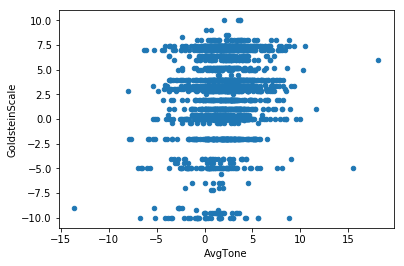

In [29]:
# Compare both AvgTone with GoldsteinScale
data_5years.plot.scatter(x='AvgTone', y='GoldsteinScale')
corr_AvgTone_GoldsteinScale = data_5years['AvgTone'].corr(data_5years['GoldsteinScale'])
print("Nilai korelasi = " + str(corr_AvgTone_GoldsteinScale))

Kita juga ingin mengecek bagaimana hubungan antara EventCode dengan nada berita. Untuk analisis ini, kita menggunakan data [CAMEO Event Codes](https://www.gdeltproject.org/data/lookups/CAMEO.eventcodes.txt). Data ini menggambarkan event berita.

In [78]:
# Read CAMEO Event Codes
data_event_codes = pd.read_csv("CAMEO.eventcodes.txt", sep="\t")
event = data_5years.groupby('EventCode')['AvgTone'].describe().reset_index()

print("Displaying top 5 Event Code")
event.sort_values('count', ascending=False).head()

# Unknown error - Merge gives duplicate rows and wrong results, hence bwe don't merge them right now
# data_event_codes = data_event_codes.rename(columns={'CAMEOEVENTCODE':'EventCode'})
# event_code = pd.merge(event, data_event_codes, on = ['EventCode'], how = 'inner')
# event_code

,EventCode,count,mean,std,min,25%,50%,75%,max
37,71,209.0,2.433928,2.218664,-4.081633,1.207815,2.311248,3.400000,10.488136
0,10,203.0,1.849129,2.156948,-5.431629,0.926314,1.938421,3.034698,8.495093
8,20,194.0,1.784534,2.265749,-4.263493,0.480124,1.768489,3.170771,8.387097
28,51,167.0,2.413918,2.230212,-5.352798,1.233203,2.256012,3.680357,9.296482
20,40,135.0,2.269778,2.330204,-3.680982,0.874198,2.093802,3.537683,11.598746


Berdasarkan data tersebut, kita dapatkan bahwa 5 event teratas yang paling sering terjadi dalam bidang startup adalah:
1. 71 -- Provide economic aid
2. 10 -- DEMAND
3. 20 -- USE UNCONVENTIONAL MASS VIOLENCE
4. 51 -- Appeal for easing of administrative sanctions
5. 40 -- Consult, not specified

Poin nomor 3 terkesan aneh, karena dalam bisnis tidak ada kekerasan. Hal ini perlu analisis lebih lanjut.

# Rencana Selanjutnya

1. Ekstraksi teks berita

2. Analisis aktor

3. Analisis word cloud

4. Analisis sentimen
